<a href="https://colab.research.google.com/github/data4class/handwrittendigits/blob/main/Simulation_Demo_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generating Random numbers via computers

#Von numen method:
$m_1 = ((a*m_0 + c) \mod M)$ \\
$m_2 = ((a*m_1 + c) \mod M)$ \\
. \\
. \\
return $(\frac{m_i}{M})$




In [ ]:
def uniform_generator(n = 1, M = 2**32, a = 69069, c = 1):
  import time
  m0 = round(10000000*time.time())%(2**32)
  if(n == 1):
    return(((a*m0 + c)%M)/M)
  lst = [0 for i in range(n)]
  for i in range(n):
    m0 = (a*m0 + c)%M
    lst[i] = m0
  return([m0/M for m0 in lst])

In [ ]:
print(uniform_generator(5))
print(uniform_generator(10))
print(uniform_generator(11))
print(uniform_generator(2))

# Other values of a, c and M which generate psuedo random numbers
# M = 2**35, a = 129, c = 1
# M = 2**32, a = 1812433253, c = 1

## Rules for a and c:
#(1) 1 = a mod g for all the divisors g of M
#(2) c and a are relatively primes

# Statistical tests:
# Histogram
import matplotlib.pyplot as plt
n = 1000000
numbers = uniform_generator(n)
plt.hist(numbers)
plt.show()
# Mean
m = sum(numbers)/n
print('Actual Mean:', m, 'Theoretical Mean:', 1/2)
# Variance
sigma = sum([(x - m)**2 for x in numbers])/n
print('Actual variance:', sigma, 'Theoretical variance:', 1/12)

In [ ]:
# Fails: M = 2**8, a = 25, c = 1
n = 250
numbers = uniform_generator(n, M = 2**8, a = 25, c = 1)
pairs_x = numbers[0:(n-1)]
pairs_y = numbers[1:n]
plt.scatter(pairs_x, pairs_y)

In [ ]:
# Random Numbers from other distribution
def normal_generator(n = 1, M = 2**32, a = 69069, c = 1):
  import time
  m0 = round(10000000*time.time())%(2**32)
  lst = [-6 for i in range(n)]
  for i in range(n*12):
    m0 = (a*m0 + c)%M
    lst[i%n] += m0/M
  return(lst if n>1 else lst[0])

In [ ]:
n = 1000000
numbers = normal_generator(n)
plt.hist(numbers, bins = 100)
plt.show()
# Mean
m = sum(numbers)/n
print('Actual Mean:', m, 'Theoretical Mean:', 0)
# Variance
sigma = sum([(x - m)**2 for x in numbers])/n
print('Actual variance:', sigma, 'Theoretical variance:', 1)


## Simulating functions of random numbers

$f(x) = x^2 + 1$ \\
$x \sim N(1, \sqrt{2})$ \\

$\mathbb{E}[f(x)]$? \\
Ans: \\
$\mathbb{E}[f(x)] = \mathbb{E}[x^2 + 1] = (\mathbb{Var}[x] + \mathbb{E}[x]^2) + 1  = 1 + 2 + 1  = 4$

In [ ]:
import random
import math
import numpy as np
N = 100000
lst = []
for i in range(N):
  x = random.gauss(mu = 1,sigma = math.sqrt(2))
  y = x**2+1
  lst.append(y)
print(sum(lst)/N)

# using numpy
X = np.random.normal(loc = 1, scale = np.sqrt(2), size = N)
Y = X*X + 1
print(Y.mean())

$f(x) = \log(x^2 + 1)$ \\
$x \sim N(0, 1)$ \\

$\mathbb{E}[f(x)]$?

In [ ]:
N = 100000
ell = []
for i in range(N):
  x = random.gauss(0,1)
  y = math.log(x**2+1)
  ell.append(y)
print(sum(ell)/N)

$I = \int_3^6 x^2 dx$

In [ ]:
# Integration using simulation
#Integrate X^2 from 3 to 6
N = 100000
ell = []
a = 3
b = 6
f = lambda x: x**2
for i in range(N):
  x = random.uniform(a,b)
  ell.append(f(x))
EfX = sum(ell)/N
I = (b-a)*EfX
print(I)

# Simulating value of pi

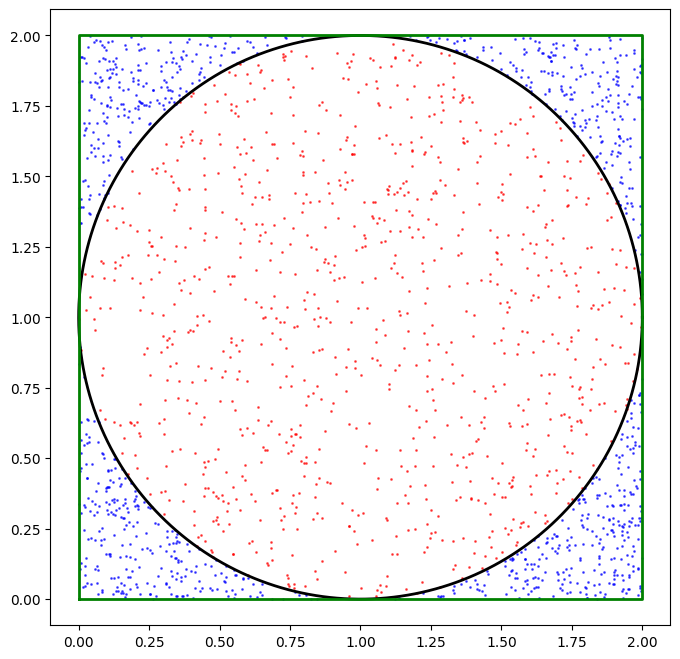

In [ ]:
# Simulating value of pi
import random
import math
import matplotlib.pyplot as plt
import numpy as np

N = 100000
Nc = 0
inside_x, inside_y = [], []
outside_x, outside_y = [], []

for _ in range(N):
    x = random.uniform(0, 2)
    y = random.uniform(0, 2)
    if(math.sqrt((x - 1)**2 + (y - 1)**2) <= 1):
        Nc += 1
        if len(inside_x) < 1000:  # Sample for plotting
            inside_x.append(x)
            inside_y.append(y)
    else:
        if len(outside_x) < 1000:  # Sample for plotting
            outside_x.append(x)
            outside_y.append(y)

print(4*Nc/N, math.pi)


In [ ]:
# Generate above the picture
plt.figure(figsize=(8, 8))
plt.scatter(inside_x, inside_y, c='red', s=1, alpha=0.6)
plt.scatter(outside_x, outside_y, c='blue', s=1, alpha=0.6)

# Draw circle
theta = np.linspace(0, 2*np.pi, 1000)
circle_x = 1 + np.cos(theta)
circle_y = 1 + np.sin(theta)
plt.plot(circle_x, circle_y, 'black', linewidth=2)

# Draw square
plt.plot([0, 2, 2, 0, 0], [0, 0, 2, 2, 0], 'green', linewidth=2)

plt.xlim(0, 2)
plt.ylim(0, 2)
plt.axis('equal')
plt.show()

# Distribution of returns of a stock price

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define stock symbols (adding .NS suffix for NSE stocks)
stocks = ['RELIANCE.NS', 'INFY.NS', 'ADANIPORTS.NS', 'POWERGRID.NS', 'SBIN.NS']

import yfinance as yf
import pandas as pd
import numpy as np
import time

# Define stock symbols
stocks = ['RELIANCE.NS', 'INFY.NS', 'ADANIPORTS.NS', 'POWERGRID.NS', 'SBIN.NS']

# Download data for each stock individually
all_prices = []
all_returns = []

for stock in stocks:
        ticker = yf.Ticker(stock)
        hist = ticker.history(period='5y')

        # Extract close prices
        prices = hist['Close'].dropna()

        # Calculate daily returns
        returns = prices.pct_change().dropna()

        all_prices.append(prices.tolist())
        all_returns.append(returns.tolist())

        print(f"Downloaded {stock}: {len(prices)} days, {len(returns)} returns")

        # Small delay to be respectful to the API
        time.sleep(0.1)

# Create DataFrame for analysis
returns_df = pd.DataFrame()
prices_df = pd.DataFrame()
for i, stock in enumerate(stocks):
    if i < len(all_returns):
        # Align all return and price series by date??
        # Note that this is just a index based alignment not date. Exercise: do this date wise
        returns_df[stock] = pd.Series(all_returns[i])
        prices_df[stock] = pd.Series(all_prices[i])

print(f"\nFinal returns DataFrame shape: {returns_df.shape}")
print("\nFirst few daily returns:")


In [ ]:
print(returns_df)
print(prices_df)

In [ ]:
from matplotlib import pyplot as plt
plt.hist(returns_df[stocks[3]], bins=100)
plt.show()

## Simulating prices using lognormal distribution

$\log(S_t/S_0) = {((r - \frac{1}{2}\Delta^2)t + \Delta \sqrt{t} z)}$ \\

$S_t = S_0e^{((r - \frac{1}{2}\Delta^2)t + \Delta \sqrt{t} z)}$ \\
$z \sim N(0,1)$


In [ ]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

stocks = ['RELIANCE.NS', 'INFY.NS', 'ADANIPORTS.NS', 'POWERGRID.NS', 'SBIN.NS']
symbol = stocks[2]
d = returns_df.shape[0] # Number of days
S0 = prices_df[symbol][d-1]
t = 1/52 # 1 week
r = sum(returns_df[symbol])/5
delta = np.sqrt(np.var(returns_df[symbol])/5)
def S(S0, r, delta, t, z):
  return(S0*math.exp((r - (delta**2)/2)*t + delta*z*math.sqrt(t)))
N = 10000
St = [0 for _ in range(N)]
for i in range(N):
  z = random.gauss(0,1)
  St[i] = S(S0, r, delta, t, z)
print(St)
print(np.mean(St), S0)


In [ ]:
# To simulate five paths for reliance for 10 weeks from now.
s = 3
d = prices_df.shape[0]
S0 = prices_df[stocks[s]][d-1]
mu = sum(returns_df[stocks[s]])/5
delta = np.sqrt(np.var(returns_df[symbol])/5)

N = 5
weeks = 10
St = [[0 for _ in range(weeks)] for _ in range(N)]
for i in range(N):
  for t in range(weeks):
    z = random.gauss(0,1)
    St[i][t] = round(S(S0, mu, delta, (t+1)/52, z), 2)
print(St)
for i in range(N):
  plt.plot(St[i])

plt.show()

# Exercise: Test the model for high-frequency trade data


In [ ]:
# Compute probability that stock give less than five percent return in one week

stocks = ['RELIANCE.NS', 'INFY.NS', 'ADANIPORTS.NS', 'POWERGRID.NS', 'SBIN.NS']
symbol = stocks[2]
d = returns_df.shape[0] # Number of days
S0 = prices_df[symbol][d-1]
t = 1/52 # 1 week
r = sum(returns_df[symbol])/5
delta = np.sqrt(np.var(returns_df[symbol])/5)
def S(S0, mu, delta, t, z):
  return(S0*math.exp((mu - (delta**2)/2)*t + delta*z*math.sqrt(t)))
N = 100000
St = [0 for _ in range(N)]
Nc = 0
alpha = -0.005
for i in range(N):
  z = random.gauss(0,1)
  St[i] = S(S0, mu, delta, t, z)
  if(St[i]/S0 < 1 - alpha):
    Nc += 1
print(Nc/N)


# Generalization

$S_t = S_0e^{((\mu - \sigma^2/2)t + \sqrt{t}Vz)}$ \\
where $V^TV = \Sigma$ and $\Sigma$ is a variance-covariance matrix.

In [ ]:
#More than one securites correlated securities.
S0 = [prices_df[symbol][d-1] for symbol in stocks]
C = returns_df.cov()
mu_bar = [sum(returns_df[symbol])/5 for symbol in stocks]
delta_square = np.diag(C).reshape(-1, 1) # Read variances from diagonal and create a column vector
V = np.linalg.cholesky(C) # Compute cholesky decomposition, i.e., C = V^T*V
N = 100000
t = 1/12
n = 5
z = np.random.normal(size=(n,N))
S0 = np.array(S0).reshape(-1, 1)  # Convert matrix to 1D array
mu_bar = np.array(mu_bar).reshape(-1, 1)  # Convert generator to array

St = np.multiply(S0, np.exp((mu_bar - delta_square/2)*t + np.matmul(V,z)*np.sqrt(t)))
print(np.mean(St, axis = 1))



In [ ]:
# For a given portfolio of n securities (w), what is the value at risk at 1%, 5%
stock_returns = St/S0 - 1

# Calculate VaR for each stock separately
for i, stock in enumerate(stocks):
    VaR_95 = np.percentile(stock_returns[i], 5)
    VaR_99 = np.percentile(stock_returns[i], 1)
    print(f"{stock} - VaR (95%): {VaR_95:.6f}, VaR (99%): {VaR_99:.6f}")

# Exercise : Compute Var for portfolio with equal weights. Then implement for any weights.

In [ ]:
# Derrivative pricing and Greeks values using MCS
# 1. Option price:

stocks = ['RELIANCE.NS', 'INFY.NS', 'ADANIPORTS.NS', 'POWERGRID.NS', 'SBIN.NS']
symbol = stocks[2]
d = returns_df.shape[0] # Number of days
S0 = prices_df[symbol][d-1]
mu = sum(returns_df[symbol])/5
delta = np.sqrt(np.var(returns_df[symbol])/5)

t = 1/52 # 1 week
N = 1000
St = [0 for _ in range(N)]
for i in range(N):
  z = random.gauss(0,1)
  St[i] = S(S0, mu, delta, t, z)

K = 1430
print(S0)
P = [max(s-K,0) for s in St]
print(sum(P)/N) # payoff



In [ ]:
# Greeks
#2. Delta
ds  = 0.05

K = 1430
D = [(max(s+ds-K,0) - max(s-K,0))/ds for s in St]
print(sum(D)/N)

## Exercise: Implement all other Greeks like vega, theta, gamma etc.